In [1]:
%matplotlib inline
import re
from os import path, getenv, environ
from typing import Dict

from datetime import datetime

import folium
import matplotlib.pyplot as plt
#import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import scipy
import scipy.stats as stats
import seaborn as sns
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


set_config(display="diagram", print_changed_only=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date 
#from datetime import datetime
import seaborn as sns
from scipy import stats
#import statsmodels.api
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
import os

# Listez les fichiers et dossiers à la racine
print(os.listdir("/"))


['proc', 'usr', 'run', 'tmp', 'bin', 'mnt', 'media', 'opt', 'root', 'etc', 'boot', 'libx32', 'home', 'lib64', 'lib32', 'lib', 'sbin', 'sys', 'dev', 'var', 'srv']


In [21]:
print("Contenu de /home :", os.listdir("/home"))



Contenu de /home : ['onyxia']


In [22]:
import os
print("Contenu de /home/onyxia :", os.listdir("/home/onyxia"))



Contenu de /home/onyxia : ['.profile', '.bashrc', '.bash_logout', 'work', '.sudo_as_admin_successful', '.cache', '.local', '.kube', '.metaflowconfig', '.ipython', '.config', '.duckdbrc', '.jupyter', '.gitconfig', '.conda', '.duckdb', '.wget-hsts', '.TinyTeX', '.krew', '.launchpadlib']


In [23]:
def search_directory(base_dir, target):
    for root, dirs, files in os.walk(base_dir):
        if target in dirs:
            return os.path.join(root, target)
    return None

# Rechercher le dépôt dans /home/onyxia
repo_path = search_directory("/home/onyxia", "PROJET-D-ADVANCE-ML")
print("Chemin du dépôt cloné :", repo_path)


Chemin du dépôt cloné : /home/onyxia/work/PROJET-D-ADVANCE-ML


In [24]:
if repo_path:
    os.chdir(repo_path)
    print("Répertoire actuel :", os.getcwd())
    print("Fichiers disponibles :", os.listdir())
else:
    print("Dépôt non trouvé.")


Répertoire actuel : /home/onyxia/work/PROJET-D-ADVANCE-ML
Fichiers disponibles : ['kmeans.ipynb', 'LSTM.ipynb', '.git', 'cluster_1.csv', 'Single_File_Creation_and_encoding.ipynb', 'base_class22.csv', 'caracterisation_classes.ipynb', 'cluster_2.csv', 'README.md', 'cluster_0.csv', 'traitements.ipynb', '.ipynb_checkpoints', 'base_ano22_utf8.csv']


In [26]:
# Importation de la base de données  avec la fonction path.join qui prend en argument la localisation

# ce fichier recuperé  sera affecté à la varaible data et le séparateur est point virgule.
data_0 = pd.read_csv("cluster_0.csv", sep=",")
# Utilisation de shape pour afficher la taille( nombres de ligne, nombre de colonnes) de data
print("The data shape is: {shape}".format(shape=data_0.shape))
data_0.head()

The data shape is: (194301, 55)


,ra_0122,ra_0222,ra_0322,ra_0422,ra_0522,ra_0622,ra_0722,ra_0822,ra_0922,ra_1022,ra_1122,ra_1222,ra_0123,ra_0223,ra_0323,ra_0423,ra_0523,ra_0623,ra_0723,ra_0823,ra_0923,ra_1023,ra_1123,ra_1223,ra_0124,ra_0224,ra_0324,ra_0424,ra_0524,ra_0624,ra_0724,ra_0824,Age22,is_genre_Enfant,is_genre_Femme,is_genre_Homme,is_genre_Pas de donnees,is_benef_Autre,is_benef_Conjoint,is_benef_Enfant majeur,is_benef_Enfant mineur,is_benef_Salarié,is_foyer_ND,is_foyer_Salarié et 1 enfant,is_foyer_Salarié et 2 enfants,is_foyer_Salarié et 3+ enfants,is_foyer_Salarié et conjoint et 1 enfant,is_foyer_Salarié et conjoint et 2 enfants,is_foyer_Salarié et conjoint et 3+ enfants,is_foyer_Salarié et conjoint sans enfant,is_foyer_Salarié seul,region_ETR,region_IDF,region_OTH,Cluster
0,0.000000,0.59,0.000,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.000000,0.00,0.000,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0000,0.0,0.0,0.0,0.845,0.0,0.0,0.0,0.000,1.398148,1.028235,0.756,0.416667,0.416667,0.97,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,52.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,0.967500,0.00,0.000,0.0,0.0,1.34,0.665714,0.00,0.000000,0.6115,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,72.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,0.000000,0.00,1.185,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.215,0.000000,0.000000,0.000,0.816667,0.000000,2.03,0.0,1.422,0.0,1.422,0.0,0.0,0.0,0.0,55.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,0.763333,0.00,0.000,0.0,0.0,0.71,0.000000,0.71,0.893333,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,54.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [1]:
%matplotlib inline
import re
from os import path, getenv, environ
from typing import Dict

from datetime import datetime

import folium
import matplotlib.pyplot as plt
#import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import scipy
import scipy.stats as stats
import seaborn as sns
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


set_config(display="diagram", print_changed_only=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date 
#from datetime import datetime
import seaborn as sns
from scipy import stats
#import statsmodels.api
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Importation de la base de données  avec la fonction path.join qui prend en argument la localisation

# ce fichier recuperé  sera affecté à la varaible data et le séparateur est point virgule.
data_0 = pd.read_csv("cluster_0.csv", sep=",")
# Utilisation de shape pour afficher la taille( nombres de ligne, nombre de colonnes) de data
print("The data shape is: {shape}".format(shape=data_0.shape))
data_0.head()

The data shape is: (194301, 55)


,ra_0122,ra_0222,ra_0322,ra_0422,ra_0522,ra_0622,ra_0722,ra_0822,ra_0922,ra_1022,ra_1122,ra_1222,ra_0123,ra_0223,ra_0323,ra_0423,ra_0523,ra_0623,ra_0723,ra_0823,ra_0923,ra_1023,ra_1123,ra_1223,ra_0124,ra_0224,ra_0324,ra_0424,ra_0524,ra_0624,ra_0724,ra_0824,Age22,is_genre_Enfant,is_genre_Femme,is_genre_Homme,is_genre_Pas de donnees,is_benef_Autre,is_benef_Conjoint,is_benef_Enfant majeur,is_benef_Enfant mineur,is_benef_Salarié,is_foyer_ND,is_foyer_Salarié et 1 enfant,is_foyer_Salarié et 2 enfants,is_foyer_Salarié et 3+ enfants,is_foyer_Salarié et conjoint et 1 enfant,is_foyer_Salarié et conjoint et 2 enfants,is_foyer_Salarié et conjoint et 3+ enfants,is_foyer_Salarié et conjoint sans enfant,is_foyer_Salarié seul,region_ETR,region_IDF,region_OTH,Cluster
0,0.000000,0.59,0.000,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.000000,0.00,0.000,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0000,0.0,0.0,0.0,0.845,0.0,0.0,0.0,0.000,1.398148,1.028235,0.756,0.416667,0.416667,0.97,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,52.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,0.967500,0.00,0.000,0.0,0.0,1.34,0.665714,0.00,0.000000,0.6115,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,72.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,0.000000,0.00,1.185,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.215,0.000000,0.000000,0.000,0.816667,0.000000,2.03,0.0,1.422,0.0,1.422,0.0,0.0,0.0,0.0,55.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,0.763333,0.00,0.000,0.0,0.0,0.71,0.000000,0.71,0.893333,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,54.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [4]:
# Importation de la base de données  avec la fonction path.join qui prend en argument la localisation

# ce fichier recuperé  sera affecté à la varaible data et le séparateur est point virgule.
data_1 = pd.read_csv("cluster_1.csv", sep=",")
# Utilisation de shape pour afficher la taille( nombres de ligne, nombre de colonnes) de data
print("The data shape is: {shape}".format(shape=data_1.shape))
data_1.head()

The data shape is: (176394, 55)


,ra_0122,ra_0222,ra_0322,ra_0422,ra_0522,ra_0622,ra_0722,ra_0822,ra_0922,ra_1022,ra_1122,ra_1222,ra_0123,ra_0223,ra_0323,ra_0423,ra_0523,ra_0623,ra_0723,ra_0823,ra_0923,ra_1023,ra_1123,ra_1223,ra_0124,ra_0224,ra_0324,ra_0424,ra_0524,ra_0624,ra_0724,ra_0824,Age22,is_genre_Enfant,is_genre_Femme,is_genre_Homme,is_genre_Pas de donnees,is_benef_Autre,is_benef_Conjoint,is_benef_Enfant majeur,is_benef_Enfant mineur,is_benef_Salarié,is_foyer_ND,is_foyer_Salarié et 1 enfant,is_foyer_Salarié et 2 enfants,is_foyer_Salarié et 3+ enfants,is_foyer_Salarié et conjoint et 1 enfant,is_foyer_Salarié et conjoint et 2 enfants,is_foyer_Salarié et conjoint et 3+ enfants,is_foyer_Salarié et conjoint sans enfant,is_foyer_Salarié seul,region_ETR,region_IDF,region_OTH,Cluster
0,0.0,0.0,0.0,0.602857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.00000,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.068571,0.0,0.0,0.000,0.00000,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.00000,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.889,1.14625,0.725,0.0,0.764667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.00000,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.553333,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [5]:
# Importation de la base de données  avec la fonction path.join qui prend en argument la localisation

# ce fichier recuperé  sera affecté à la varaible data et le séparateur est point virgule.
data_2 = pd.read_csv("cluster_2.csv", sep=",")
# Utilisation de shape pour afficher la taille( nombres de ligne, nombre de colonnes) de data
print("The data shape is: {shape}".format(shape=data_2.shape))
data_2.head()

The data shape is: (285242, 55)


,ra_0122,ra_0222,ra_0322,ra_0422,ra_0522,ra_0622,ra_0722,ra_0822,ra_0922,ra_1022,ra_1122,ra_1222,ra_0123,ra_0223,ra_0323,ra_0423,ra_0523,ra_0623,ra_0723,ra_0823,ra_0923,ra_1023,ra_1123,ra_1223,ra_0124,ra_0224,ra_0324,ra_0424,ra_0524,ra_0624,ra_0724,ra_0824,Age22,is_genre_Enfant,is_genre_Femme,is_genre_Homme,is_genre_Pas de donnees,is_benef_Autre,is_benef_Conjoint,is_benef_Enfant majeur,is_benef_Enfant mineur,is_benef_Salarié,is_foyer_ND,is_foyer_Salarié et 1 enfant,is_foyer_Salarié et 2 enfants,is_foyer_Salarié et 3+ enfants,is_foyer_Salarié et conjoint et 1 enfant,is_foyer_Salarié et conjoint et 2 enfants,is_foyer_Salarié et conjoint et 3+ enfants,is_foyer_Salarié et conjoint sans enfant,is_foyer_Salarié seul,region_ETR,region_IDF,region_OTH,Cluster
0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.523333,1.435714,0.0,6.912000,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,32.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
1,0.00,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,39.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,0.00,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.950909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
3,1.56,0.0,0.0,1.863333,1.265454,0.0,1.100000,1.185556,0.0,1.863333,0.0,0.0,1.454,0.0,0.0,1.613333,0.0,0.950909,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.613333,41.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,0.00,0.0,0.0,1.507778,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,28.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2


In [6]:
df=data_0

# Vos conditions
conditions = [
    df['is_genre_Homme'] == 1,
    df['is_genre_Femme'] == 1,
    df['is_genre_Enfant'] == 1
]

# Les valeurs correspondantes
values = ['Homme', 'Femme', 'Enfant']

# Créer la colonne 'genre'
df['genre'] = np.select(conditions, values, default='Inconnu')

# Vos conditions
conditions = [
    df['is_benef_Conjoint'] == 1,
    df['is_benef_Enfant majeur'] == 1,
    df['is_benef_Enfant mineur'] == 1,
    df['is_benef_Salarié'] == 1
]

# Les valeurs correspondantes
values = ['Conjoint', 'Enfant majeur', 'Enfant mineur', 'Salarie']

# Créer la colonne 'genre'
df['type_benef'] = np.select(conditions, values, default='Inconnu')


# Vos conditions
conditions = [
    df['region_ETR'] == 1,
    df['region_IDF'] == 1,
    df['region_OTH'] == 1
]

# Les valeurs correspondantes
values = ['ETR', 'IDF', 'OTH']

# Créer la colonne 'genre'
df['region'] = np.select(conditions, values, default='Inconnu')


# Filtrer les colonnes dont le nom commence par 'ra'
ra_columns = df.filter(regex='^ra')

# Ajouter une colonne avec la somme des colonnes filtrées
df['somme_ra'] = ra_columns.sum(axis=1)


# Créer les tranches d'âge
df['tranche_age'] = pd.cut(
    df['Age22'], 
    bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, float('inf')],  # Les bornes des tranches
    labels=[
        '0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', 
        '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '65+'  # Étiquettes des tranches
    ],
    right=False  # Inclut la borne inférieure dans chaque tranche
)



data_0=df
data_0.head()

,ra_0122,ra_0222,ra_0322,ra_0422,ra_0522,ra_0622,ra_0722,ra_0822,ra_0922,ra_1022,ra_1122,ra_1222,ra_0123,ra_0223,ra_0323,ra_0423,ra_0523,ra_0623,ra_0723,ra_0823,ra_0923,ra_1023,ra_1123,ra_1223,ra_0124,ra_0224,ra_0324,ra_0424,ra_0524,ra_0624,ra_0724,ra_0824,Age22,is_genre_Enfant,is_genre_Femme,is_genre_Homme,is_genre_Pas de donnees,is_benef_Autre,is_benef_Conjoint,is_benef_Enfant majeur,is_benef_Enfant mineur,is_benef_Salarié,is_foyer_ND,is_foyer_Salarié et 1 enfant,is_foyer_Salarié et 2 enfants,is_foyer_Salarié et 3+ enfants,is_foyer_Salarié et conjoint et 1 enfant,is_foyer_Salarié et conjoint et 2 enfants,is_foyer_Salarié et conjoint et 3+ enfants,is_foyer_Salarié et conjoint sans enfant,is_foyer_Salarié seul,region_ETR,region_IDF,region_OTH,Cluster,genre,type_benef,region,somme_ra,tranche_age
0,0.000000,0.59,0.000,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,Femme,Salarie,OTH,0.590000,46-50
1,0.000000,0.00,0.000,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0000,0.0,0.0,0.0,0.845,0.0,0.0,0.0,0.000,1.398148,1.028235,0.756,0.416667,0.416667,0.97,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,52.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,Femme,Salarie,OTH,5.830717,51-55
2,0.967500,0.00,0.000,0.0,0.0,1.34,0.665714,0.00,0.000000,0.6115,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,72.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,Femme,Salarie,OTH,3.584714,65+
3,0.000000,0.00,1.185,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,1.215,0.000000,0.000000,0.000,0.816667,0.000000,2.03,0.0,1.422,0.0,1.422,0.0,0.0,0.0,0.0,55.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,Femme,Salarie,IDF,8.090667,56-60
4,0.763333,0.00,0.000,0.0,0.0,0.71,0.000000,0.71,0.893333,0.0000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,54.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,Femme,Conjoint,IDF,3.076667,51-55


In [7]:
df=data_1

# Vos conditions
conditions = [
    df['is_genre_Homme'] == 1,
    df['is_genre_Femme'] == 1,
    df['is_genre_Enfant'] == 1
]

# Les valeurs correspondantes
values = ['Homme', 'Femme', 'Enfant']

# Créer la colonne 'genre'
df['genre'] = np.select(conditions, values, default='Inconnu')

# Vos conditions
conditions = [
    df['is_benef_Conjoint'] == 1,
    df['is_benef_Enfant majeur'] == 1,
    df['is_benef_Enfant mineur'] == 1,
    df['is_benef_Salarié'] == 1
]

# Les valeurs correspondantes
values = ['Conjoint', 'Enfant majeur', 'Enfant mineur', 'Salarie']

# Créer la colonne 'genre'
df['type_benef'] = np.select(conditions, values, default='Inconnu')


# Vos conditions
conditions = [
    df['region_ETR'] == 1,
    df['region_IDF'] == 1,
    df['region_OTH'] == 1
]

# Les valeurs correspondantes
values = ['ETR', 'IDF', 'OTH']

# Créer la colonne 'genre'
df['region'] = np.select(conditions, values, default='Inconnu')


# Filtrer les colonnes dont le nom commence par 'ra'
ra_columns = df.filter(regex='^ra')

# Ajouter une colonne avec la somme des colonnes filtrées
df['somme_ra'] = ra_columns.sum(axis=1)


# Créer les tranches d'âge
df['tranche_age'] = pd.cut(
    df['Age22'], 
    bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, float('inf')],  # Les bornes des tranches
    labels=[
        '0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', 
        '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '65+'  # Étiquettes des tranches
    ],
    right=False  # Inclut la borne inférieure dans chaque tranche
)



data_1=df
data_1.head()



,ra_0122,ra_0222,ra_0322,ra_0422,ra_0522,ra_0622,ra_0722,ra_0822,ra_0922,ra_1022,ra_1122,ra_1222,ra_0123,ra_0223,ra_0323,ra_0423,ra_0523,ra_0623,ra_0723,ra_0823,ra_0923,ra_1023,ra_1123,ra_1223,ra_0124,ra_0224,ra_0324,ra_0424,ra_0524,ra_0624,ra_0724,ra_0824,Age22,is_genre_Enfant,is_genre_Femme,is_genre_Homme,is_genre_Pas de donnees,is_benef_Autre,is_benef_Conjoint,is_benef_Enfant majeur,is_benef_Enfant mineur,is_benef_Salarié,is_foyer_ND,is_foyer_Salarié et 1 enfant,is_foyer_Salarié et 2 enfants,is_foyer_Salarié et 3+ enfants,is_foyer_Salarié et conjoint et 1 enfant,is_foyer_Salarié et conjoint et 2 enfants,is_foyer_Salarié et conjoint et 3+ enfants,is_foyer_Salarié et conjoint sans enfant,is_foyer_Salarié seul,region_ETR,region_IDF,region_OTH,Cluster,genre,type_benef,region,somme_ra,tranche_age
0,0.0,0.0,0.0,0.602857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.00000,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,Enfant,Enfant mineur,OTH,0.602857,11-15
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.068571,0.0,0.0,0.000,0.00000,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,Enfant,Enfant mineur,ETR,1.068571,0-5
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.00000,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,Enfant,Enfant mineur,ETR,0.000000,16-20
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.889,1.14625,0.725,0.0,0.764667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,Enfant,Enfant mineur,OTH,3.524917,0-5
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.00000,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.553333,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,Enfant,Enfant mineur,ETR,0.553333,6-10


In [8]:
df=data_2

# Vos conditions
conditions = [
    df['is_genre_Homme'] == 1,
    df['is_genre_Femme'] == 1,
    df['is_genre_Enfant'] == 1
]

# Les valeurs correspondantes
values = ['Homme', 'Femme', 'Enfant']

# Créer la colonne 'genre'
df['genre'] = np.select(conditions, values, default='Inconnu')

# Vos conditions
conditions = [
    df['is_benef_Conjoint'] == 1,
    df['is_benef_Enfant majeur'] == 1,
    df['is_benef_Enfant mineur'] == 1,
    df['is_benef_Salarié'] == 1
]

# Les valeurs correspondantes
values = ['Conjoint', 'Enfant majeur', 'Enfant mineur', 'Salarie']

# Créer la colonne 'genre'
df['type_benef'] = np.select(conditions, values, default='Inconnu')


# Vos conditions
conditions = [
    df['region_ETR'] == 1,
    df['region_IDF'] == 1,
    df['region_OTH'] == 1
]

# Les valeurs correspondantes
values = ['ETR', 'IDF', 'OTH']

# Créer la colonne 'genre'
df['region'] = np.select(conditions, values, default='Inconnu')


# Filtrer les colonnes dont le nom commence par 'ra'
ra_columns = df.filter(regex='^ra')

# Ajouter une colonne avec la somme des colonnes filtrées
df['somme_ra'] = ra_columns.sum(axis=1)


# Créer les tranches d'âge
df['tranche_age'] = pd.cut(
    df['Age22'], 
    bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, float('inf')],  # Les bornes des tranches
    labels=[
        '0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', 
        '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '65+'  # Étiquettes des tranches
    ],
    right=False  # Inclut la borne inférieure dans chaque tranche
)



data_2=df
data_2.head()

,ra_0122,ra_0222,ra_0322,ra_0422,ra_0522,ra_0622,ra_0722,ra_0822,ra_0922,ra_1022,ra_1122,ra_1222,ra_0123,ra_0223,ra_0323,ra_0423,ra_0523,ra_0623,ra_0723,ra_0823,ra_0923,ra_1023,ra_1123,ra_1223,ra_0124,ra_0224,ra_0324,ra_0424,ra_0524,ra_0624,ra_0724,ra_0824,Age22,is_genre_Enfant,is_genre_Femme,is_genre_Homme,is_genre_Pas de donnees,is_benef_Autre,is_benef_Conjoint,is_benef_Enfant majeur,is_benef_Enfant mineur,is_benef_Salarié,is_foyer_ND,is_foyer_Salarié et 1 enfant,is_foyer_Salarié et 2 enfants,is_foyer_Salarié et 3+ enfants,is_foyer_Salarié et conjoint et 1 enfant,is_foyer_Salarié et conjoint et 2 enfants,is_foyer_Salarié et conjoint et 3+ enfants,is_foyer_Salarié et conjoint sans enfant,is_foyer_Salarié seul,region_ETR,region_IDF,region_OTH,Cluster,genre,type_benef,region,somme_ra,tranche_age
0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.523333,1.435714,0.0,6.912000,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,32.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,Homme,Salarie,OTH,8.871047,31-35
1,0.00,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,39.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,Femme,Salarie,ETR,0.000000,36-40
2,0.00,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.950909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,Femme,Salarie,OTH,0.950909,31-35
3,1.56,0.0,0.0,1.863333,1.265454,0.0,1.100000,1.185556,0.0,1.863333,0.0,0.0,1.454,0.0,0.0,1.613333,0.0,0.950909,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.613333,41.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,Homme,Salarie,OTH,14.469252,41-45
4,0.00,0.0,0.0,1.507778,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,28.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,Homme,Salarie,OTH,1.507778,26-30


/tmp/ipykernel_10132/2050301098.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=data_0, x='genre', ax=ax[0], palette='viridis')
/tmp/ipykernel_10132/2050301098.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=filtered_base, x='type_benef', ax=ax[1], palette='plasma')


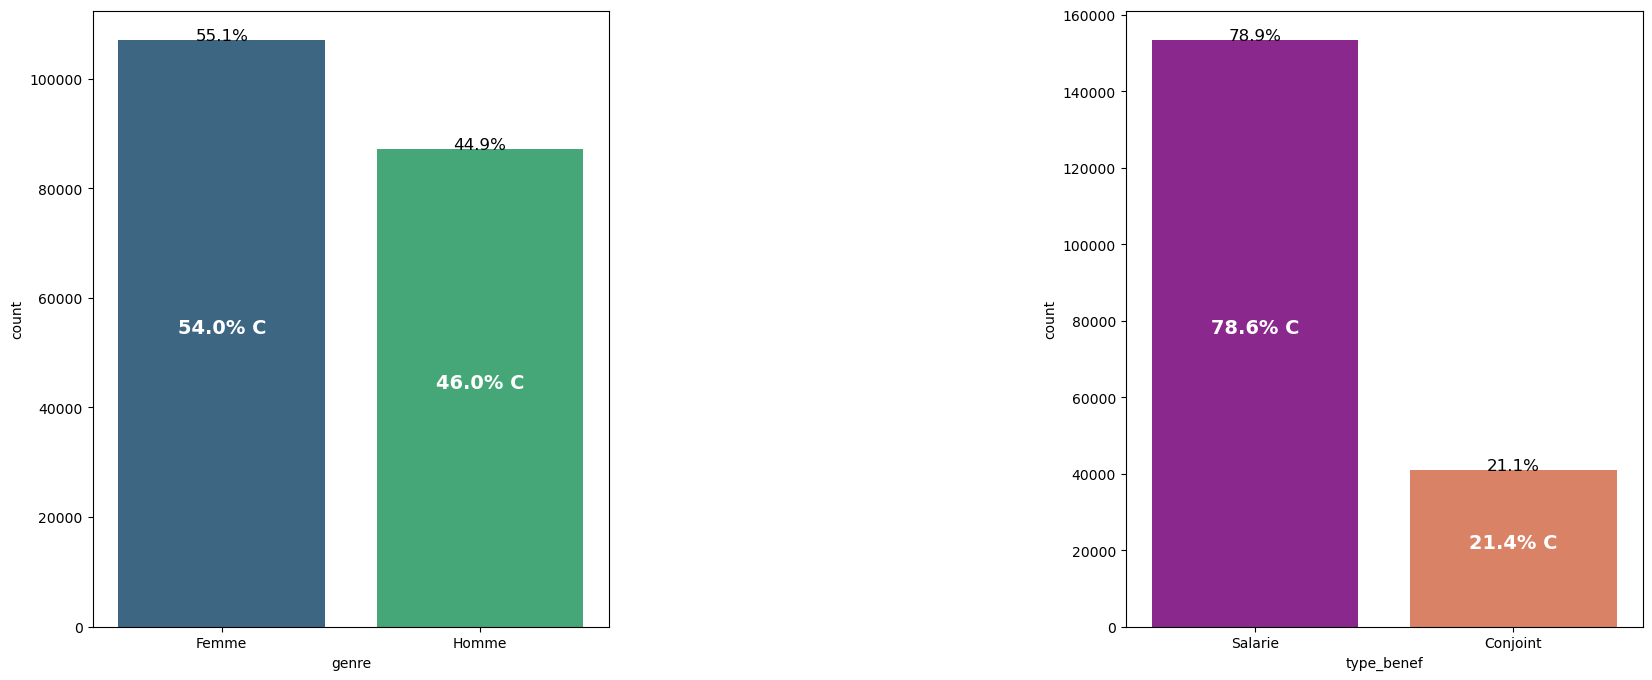

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour afficher les pourcentages
def without_hue(ax, feature, proportions=None):
    total = len(feature)
    for i, p in enumerate(ax.patches):
        # Affiche la proportion de la modalité dans la base au-dessus de la barre
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y + 0.1), size=12, ha='center')
        
        # Affiche la proportion consommée au centre de la barre
        if proportions is not None:
            # Conversion de proportions en liste pour indexation correcte
            proportions_list = list(proportions)
            consumption_percentage = '{:.1f}% C'.format(proportions_list[i])
            y_center = p.get_height() / 2  # Position au centre de la barre
            ax.annotate(consumption_percentage, (x, y_center), size=14, color='white', ha='center', weight='bold')

# Calcul des proportions de consommation (normalisées pour que la somme = 100)
def calculate_consumption_proportions(base, group_col, consumption_col):
    # Somme totale des consommations
    total_consumption = base[consumption_col].sum()
    
    # Initialisation d'un dictionnaire pour stocker les proportions
    consumption_proportions = {}
    
    # Parcourir chaque modalité unique dans la colonne spécifiée
    for modalite in base[group_col].unique():
        # Filtrer les lignes correspondant à la modalité
        subset = base[base[group_col] == modalite]
        
        # Calculer la somme des consommations pour cette modalité
        modality_sum = subset[consumption_col].sum()
        
        # Calculer la proportion en pourcentage
        consumption_proportions[modalite] = (modality_sum / total_consumption) * 100
    
    return consumption_proportions

# Création des sous-graphes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Premier graphique : proportions par genre
consumption_proportions_genre = calculate_consumption_proportions(
    data_0, 'genre', 'somme_ra'
)
ax1 = sns.countplot(data=data_0, x='genre', ax=ax[0], palette='viridis')
without_hue(ax1, data_0.genre, proportions=consumption_proportions_genre.values())

# Deuxième graphique : proportions par type de bénéficiaire (hors "Autre")
filtered_base = data_0[data_0['type_benef'] != 'Autre']
consumption_proportions_benef = calculate_consumption_proportions(
    filtered_base, 'type_benef', 'somme_ra'
)
ax2 = sns.countplot(data=filtered_base, x='type_benef', ax=ax[1], palette='plasma')
without_hue(ax2, filtered_base.type_benef, proportions=consumption_proportions_benef.values())

# Ajustement de l'espacement entre les sous-graphiques
plt.subplots_adjust(wspace=1)

# Affichage des graphiques
plt.show()


/tmp/ipykernel_10132/4096933068.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=data_1, x='genre', ax=ax[0], palette='viridis')
/tmp/ipykernel_10132/4096933068.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=filtered_base, x='type_benef', ax=ax[1], palette='plasma')


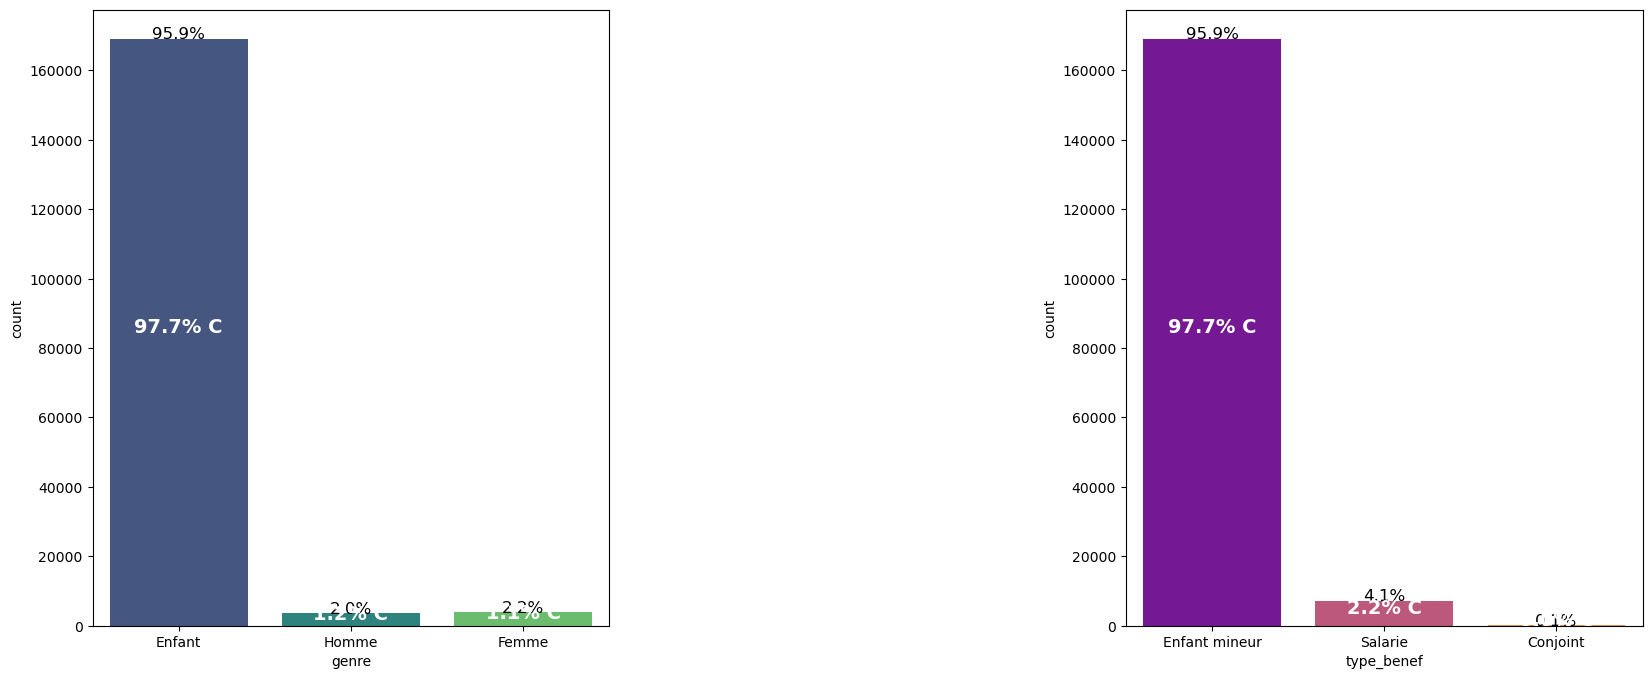

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour afficher les pourcentages
def without_hue(ax, feature, proportions=None):
    total = len(feature)
    for i, p in enumerate(ax.patches):
        # Affiche la proportion de la modalité dans la base au-dessus de la barre
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y + 0.), size=12, ha='center')
        
        # Affiche la proportion consommée au centre de la barre
        if proportions is not None:
            # Conversion de proportions en liste pour indexation correcte
            proportions_list = list(proportions)
            consumption_percentage = '{:.1f}% C'.format(proportions_list[i])
            y_center = p.get_height() / 2  # Position au centre de la barre
            ax.annotate(consumption_percentage, (x, y_center), size=14, color='white', ha='center', weight='bold')

# Calcul des proportions de consommation (normalisées pour que la somme = 100)
def calculate_consumption_proportions(base, group_col, consumption_col):
    # Somme totale des consommations
    total_consumption = base[consumption_col].sum()
    
    # Initialisation d'un dictionnaire pour stocker les proportions
    consumption_proportions = {}
    
    # Parcourir chaque modalité unique dans la colonne spécifiée
    for modalite in base[group_col].unique():
        # Filtrer les lignes correspondant à la modalité
        subset = base[base[group_col] == modalite]
        
        # Calculer la somme des consommations pour cette modalité
        modality_sum = subset[consumption_col].sum()
        
        # Calculer la proportion en pourcentage
        consumption_proportions[modalite] = (modality_sum / total_consumption) * 100
    
    return consumption_proportions

# Création des sous-graphes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Premier graphique : proportions par genre
consumption_proportions_genre = calculate_consumption_proportions(
    data_1, 'genre', 'somme_ra'
)
ax1 = sns.countplot(data=data_1, x='genre', ax=ax[0], palette='viridis')
without_hue(ax1, data_1.genre, proportions=consumption_proportions_genre.values())

# Deuxième graphique : proportions par type de bénéficiaire (hors "Autre")
filtered_base = data_1[data_1['type_benef'] != 'Autre']
consumption_proportions_benef = calculate_consumption_proportions(
    filtered_base, 'type_benef', 'somme_ra'
)
ax2 = sns.countplot(data=filtered_base, x='type_benef', ax=ax[1], palette='plasma')
without_hue(ax2, filtered_base.type_benef, proportions=consumption_proportions_benef.values())

# Ajustement de l'espacement entre les sous-graphiques
plt.subplots_adjust(wspace=1)

# Affichage des graphiques
plt.show()

/tmp/ipykernel_10132/542491050.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=data_2, x='genre', ax=ax[0], palette='viridis')
/tmp/ipykernel_10132/542491050.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=filtered_base, x='type_benef', ax=ax[1], palette='plasma')


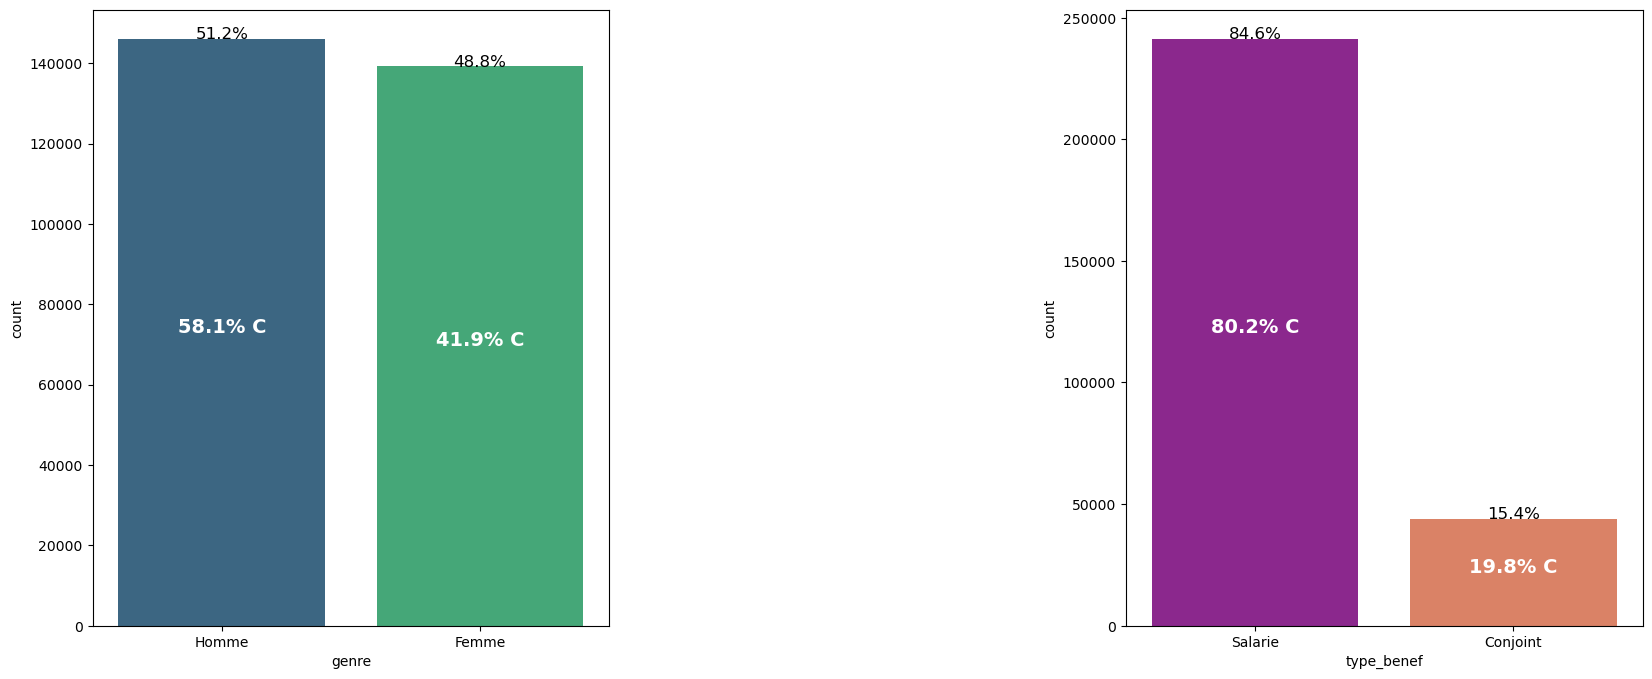

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour afficher les pourcentages
def without_hue(ax, feature, proportions=None):
    total = len(feature)
    for i, p in enumerate(ax.patches):
        # Affiche la proportion de la modalité dans la base au-dessus de la barre
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y + 0.1), size=12, ha='center')
        
        # Affiche la proportion consommée au centre de la barre
        if proportions is not None:
            # Conversion de proportions en liste pour indexation correcte
            proportions_list = list(proportions)
            consumption_percentage = '{:.1f}% C'.format(proportions_list[i])
            y_center = p.get_height() / 2  # Position au centre de la barre
            ax.annotate(consumption_percentage, (x, y_center), size=14, color='white', ha='center', weight='bold')

# Calcul des proportions de consommation (normalisées pour que la somme = 100)
def calculate_consumption_proportions(base, group_col, consumption_col):
    # Somme totale des consommations
    total_consumption = base[consumption_col].sum()
    
    # Initialisation d'un dictionnaire pour stocker les proportions
    consumption_proportions = {}
    
    # Parcourir chaque modalité unique dans la colonne spécifiée
    for modalite in base[group_col].unique():
        # Filtrer les lignes correspondant à la modalité
        subset = base[base[group_col] == modalite]
        
        # Calculer la somme des consommations pour cette modalité
        modality_sum = subset[consumption_col].sum()
        
        # Calculer la proportion en pourcentage
        consumption_proportions[modalite] = (modality_sum / total_consumption) * 100
    
    return consumption_proportions

# Création des sous-graphes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Premier graphique : proportions par genre
consumption_proportions_genre = calculate_consumption_proportions(
    data_2, 'genre', 'somme_ra'
)
ax1 = sns.countplot(data=data_2, x='genre', ax=ax[0], palette='viridis')
without_hue(ax1, data_2.genre, proportions=consumption_proportions_genre.values())

# Deuxième graphique : proportions par type de bénéficiaire (hors "Autre")
filtered_base = data_2[data_2['type_benef'] != 'Autre']
consumption_proportions_benef = calculate_consumption_proportions(
    filtered_base, 'type_benef', 'somme_ra'
)
ax2 = sns.countplot(data=filtered_base, x='type_benef', ax=ax[1], palette='plasma')
without_hue(ax2, filtered_base.type_benef, proportions=consumption_proportions_benef.values())

# Ajustement de l'espacement entre les sous-graphiques
plt.subplots_adjust(wspace=1)

# Affichage des graphiques
plt.show()

In [13]:
data_0['tranche_age'].unique()

['46-50', '51-55', '65+', '56-60', '61-65', '41-45']
Categories (14, object): ['0-5' < '6-10' < '11-15' < '16-20' ... '51-55' < '56-60' < '61-65' < '65+']

/tmp/ipykernel_10132/2965436491.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(
/tmp/ipykernel_10132/2965436491.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


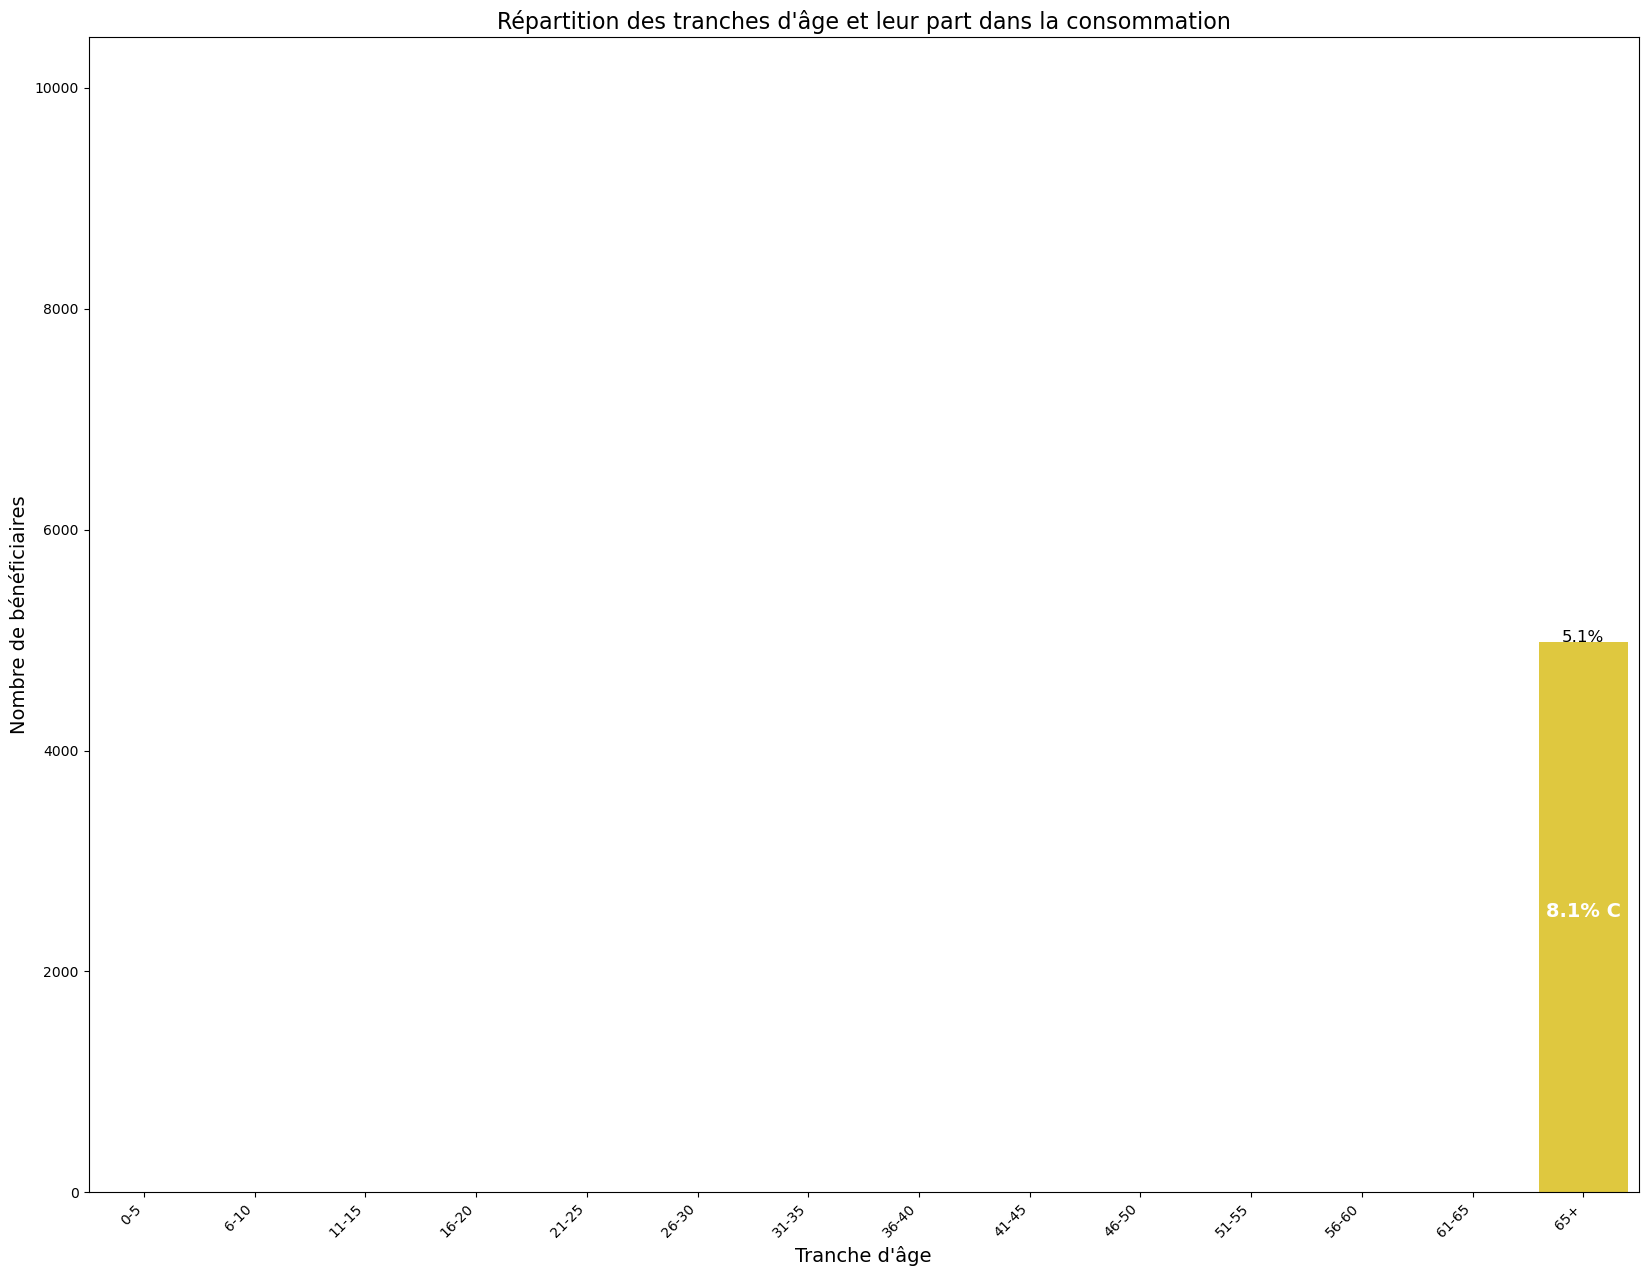

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Définir l'ordre des tranches d'âge
tranche_age_order = ['0-5','6-10', '11-15', '16-20','21-25','26-30', '31-35', '36-40', '41-45','46-50', '51-55',
                     '56-60', '61-65', '65+']

# Trier les données en fonction de l'ordre des tranches d'âge
data_0['tranche_age'] = pd.Categorical(data_0['tranche_age'], categories=tranche_age_order, ordered=True)
data_0_sorted = data_0.sort_values('tranche_age')

# Calcul des proportions de consommation
def calculate_consumption_proportions(base, group_col, consumption_col):
    total_consumption = base[consumption_col].sum()
    consumption_proportions = {}
    for modalite in base[group_col].unique():
        subset = base[base[group_col] == modalite]
        modality_sum = subset[consumption_col].sum()
        consumption_proportions[modalite] = (modality_sum / total_consumption) * 100
    return consumption_proportions

# Obtenir les proportions de consommation par tranche d'âge
consumption_proportions_age = calculate_consumption_proportions(
    data_0_sorted[data_0_sorted['tranche_age'] != 'Pas de donnees'],
    'tranche_age',
    'somme_ra'
)

# Création du graphique
fig, ax = plt.subplots(figsize=(20, 15))

# Création du countplot
ax1 = sns.countplot(
    data=data_0_sorted[data_0_sorted['tranche_age'] != 'Pas de donnees'], 
    x='tranche_age', 
    palette='plasma'
)

# Réduire la longueur (hauteur) des barres par 2
for p in ax1.patches:
    p.set_height(p.get_height() / 2)

# Ajouter les annotations
def without_hue(ax, feature, proportions=None):
    total = len(feature)
    for i, p in enumerate(ax.patches):
        # Proportion dans le portefeuille
        percentage = '{:.1f}%'.format(100 * p.get_height() * 2 / total)  # Multiplier par 2 pour refléter la vraie proportion
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y + 0.1), size=12, ha='center')
        
        # Proportion dans la consommation
        if proportions is not None:
            proportions_list = list(proportions.values())
            consumption_percentage = '{:.1f}% C'.format(proportions_list[i])
            y_center = p.get_height() / 2
            ax.annotate(consumption_percentage, (x, y_center), size=14, color='white', ha='center', weight='bold')

# Ajouter les annotations au graphique
without_hue(
    ax1, 
    data_0_sorted[data_0_sorted['tranche_age'] != 'Pas de donnees'].tranche_age, 
    proportions=consumption_proportions_age
)

# Ajustement des étiquettes de l'axe des abscisses
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Titre et labels
ax1.set_title('Répartition des tranches d\'âge et leur part dans la consommation', fontsize=16)
ax1.set_xlabel('Tranche d\'âge', fontsize=14)
ax1.set_ylabel('Nombre de bénéficiaires', fontsize=14)

# Affichage du graphique
plt.show()


/tmp/ipykernel_10132/3130183537.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(
/tmp/ipykernel_10132/3130183537.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


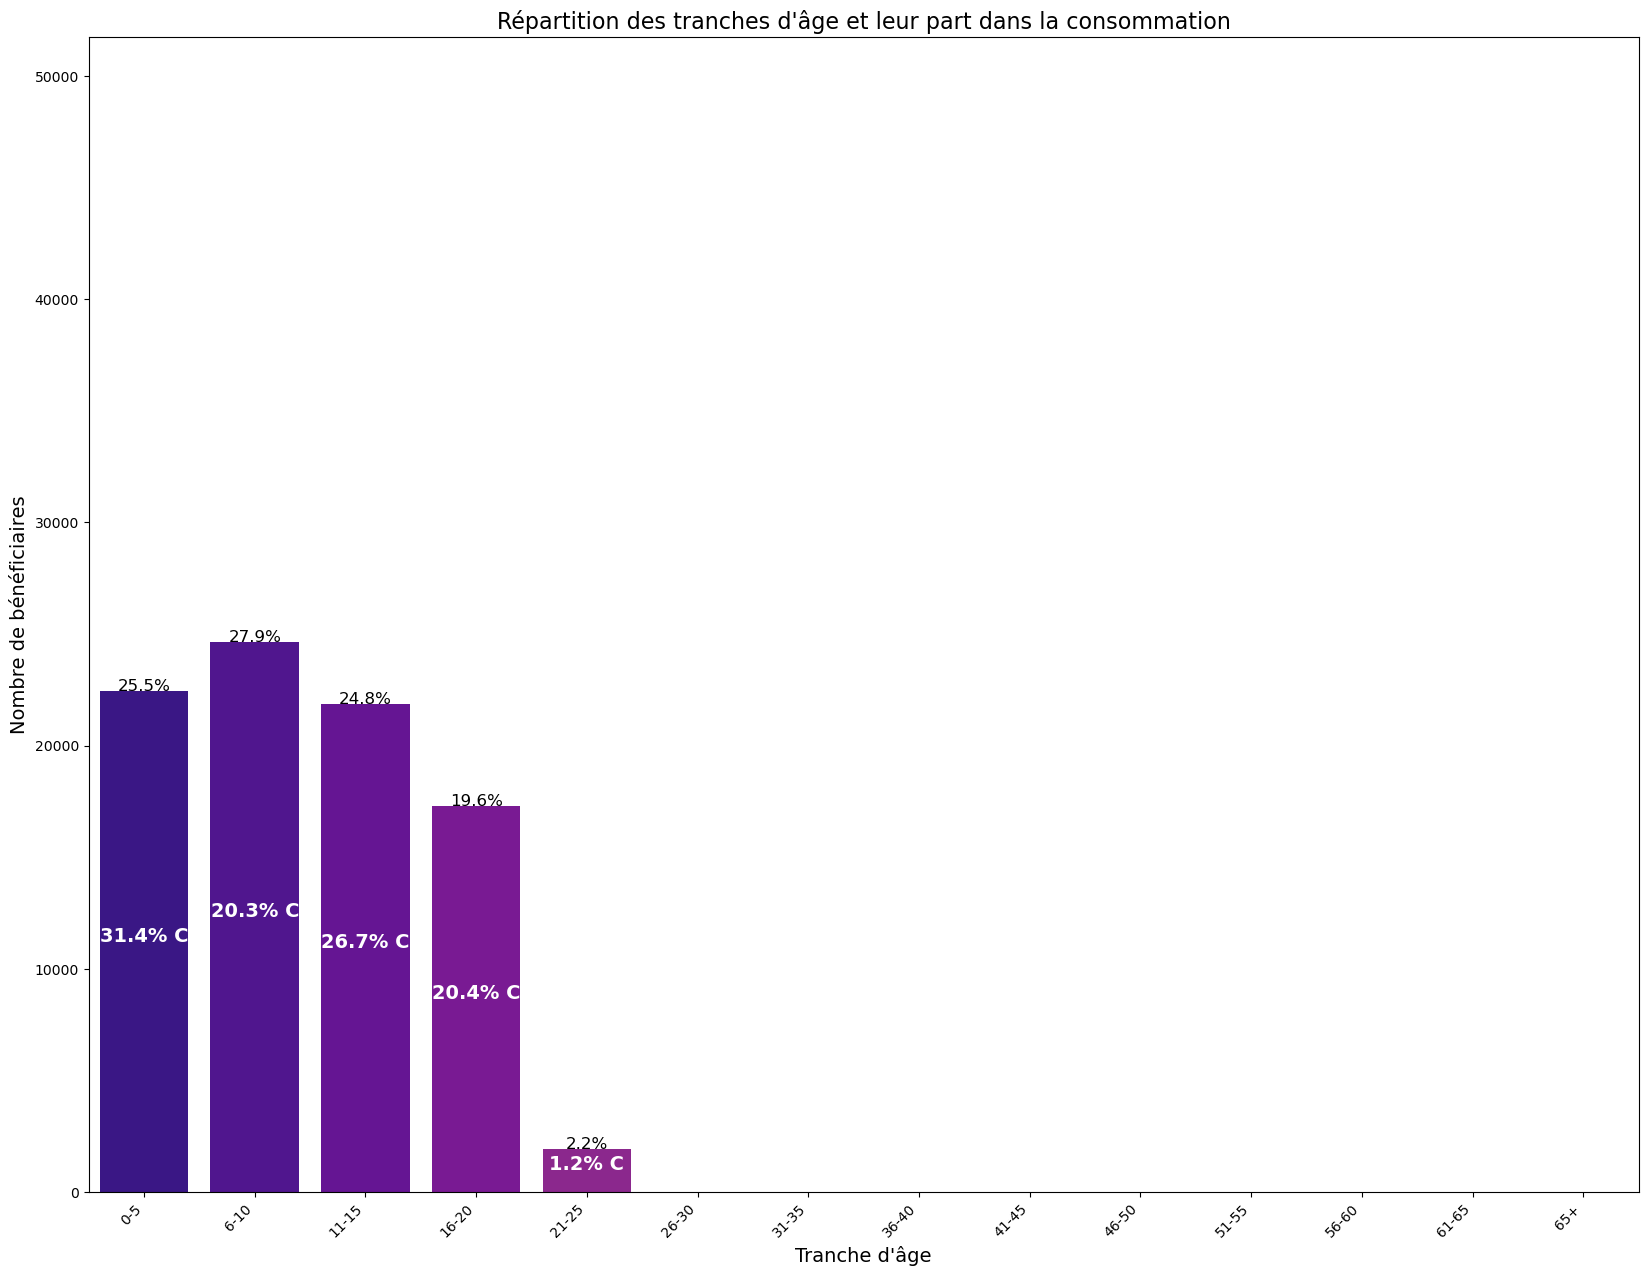

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Définir l'ordre des tranches d'âge
tranche_age_order = ['0-5','6-10', '11-15', '16-20','21-25','26-30', '31-35', '36-40', '41-45','46-50', '51-55',
                     '56-60', '61-65', '65+']

# Trier les données en fonction de l'ordre des tranches d'âge
data_1['tranche_age'] = pd.Categorical(data_1['tranche_age'], categories=tranche_age_order, ordered=True)
data_1_sorted = data_1.sort_values('tranche_age')

# Calcul des proportions de consommation
def calculate_consumption_proportions(base, group_col, consumption_col):
    total_consumption = base[consumption_col].sum()
    consumption_proportions = {}
    for modalite in base[group_col].unique():
        subset = base[base[group_col] == modalite]
        modality_sum = subset[consumption_col].sum()
        consumption_proportions[modalite] = (modality_sum / total_consumption) * 100
    return consumption_proportions

# Obtenir les proportions de consommation par tranche d'âge
consumption_proportions_age = calculate_consumption_proportions(
    data_1_sorted[data_1_sorted['tranche_age'] != 'Pas de donnees'],
    'tranche_age',
    'somme_ra'
)

# Création du graphique
fig, ax = plt.subplots(figsize=(20, 15))

# Création du countplot
ax1 = sns.countplot(
    data=data_1_sorted[data_1_sorted['tranche_age'] != 'Pas de donnees'], 
    x='tranche_age', 
    palette='plasma'
)

# Réduire la longueur (hauteur) des barres par 2
for p in ax1.patches:
    p.set_height(p.get_height() / 2)

# Ajouter les annotations
def without_hue(ax, feature, proportions=None):
    total = len(feature)
    for i, p in enumerate(ax.patches):
        # Proportion dans le portefeuille
        percentage = '{:.1f}%'.format(100 * p.get_height() * 2 / total)  # Multiplier par 2 pour refléter la vraie proportion
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y + 0.1), size=12, ha='center')
        
        # Proportion dans la consommation
        if proportions is not None:
            proportions_list = list(proportions.values())
            consumption_percentage = '{:.1f}% C'.format(proportions_list[i])
            y_center = p.get_height() / 2
            ax.annotate(consumption_percentage, (x, y_center), size=14, color='white', ha='center', weight='bold')

# Ajouter les annotations au graphique
without_hue(
    ax1, 
    data_1_sorted[data_1_sorted['tranche_age'] != 'Pas de donnees'].tranche_age, 
    proportions=consumption_proportions_age
)

# Ajustement des étiquettes de l'axe des abscisses
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Titre et labels
ax1.set_title('Répartition des tranches d\'âge et leur part dans la consommation', fontsize=16)
ax1.set_xlabel('Tranche d\'âge', fontsize=14)
ax1.set_ylabel('Nombre de bénéficiaires', fontsize=14)

# Affichage du graphique
plt.show()


/tmp/ipykernel_10132/1690401860.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(
/tmp/ipykernel_10132/1690401860.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


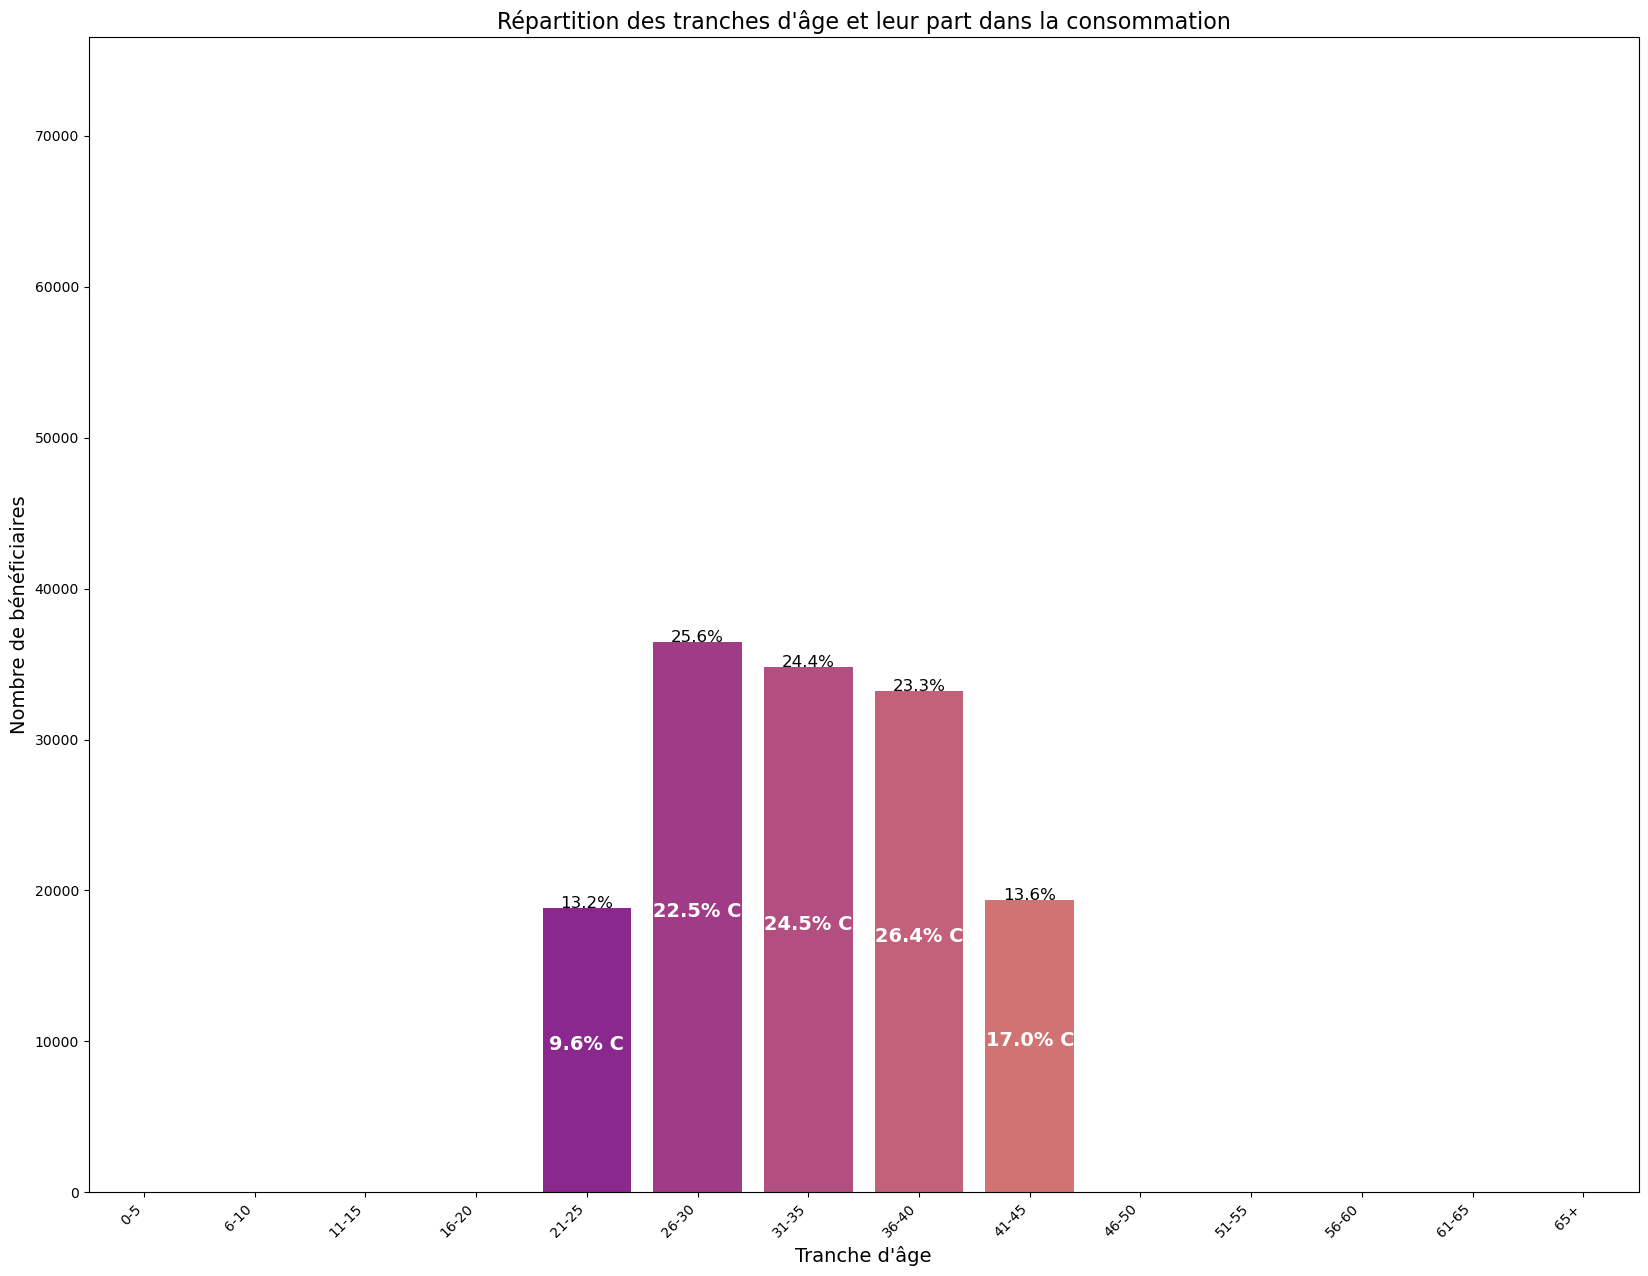

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Définir l'ordre des tranches d'âge
tranche_age_order = ['0-5','6-10', '11-15', '16-20','21-25','26-30', '31-35', '36-40', '41-45','46-50', '51-55',
                     '56-60', '61-65', '65+']

# Trier les données en fonction de l'ordre des tranches d'âge
data_2['tranche_age'] = pd.Categorical(data_2['tranche_age'], categories=tranche_age_order, ordered=True)
data_2_sorted = data_2.sort_values('tranche_age')

# Calcul des proportions de consommation
def calculate_consumption_proportions(base, group_col, consumption_col):
    total_consumption = base[consumption_col].sum()
    consumption_proportions = {}
    for modalite in base[group_col].unique():
        subset = base[base[group_col] == modalite]
        modality_sum = subset[consumption_col].sum()
        consumption_proportions[modalite] = (modality_sum / total_consumption) * 100
    return consumption_proportions

# Obtenir les proportions de consommation par tranche d'âge
consumption_proportions_age = calculate_consumption_proportions(
    data_2_sorted[data_2_sorted['tranche_age'] != 'Pas de donnees'],
    'tranche_age',
    'somme_ra'
)

# Création du graphique
fig, ax = plt.subplots(figsize=(20, 15))

# Création du countplot
ax1 = sns.countplot(
    data=data_2_sorted[data_2_sorted['tranche_age'] != 'Pas de donnees'], 
    x='tranche_age', 
    palette='plasma'
)

# Réduire la longueur (hauteur) des barres par 2
for p in ax1.patches:
    p.set_height(p.get_height() / 2)

# Ajouter les annotations
def without_hue(ax, feature, proportions=None):
    total = len(feature)
    for i, p in enumerate(ax.patches):
        # Proportion dans le portefeuille
        percentage = '{:.1f}%'.format(100 * p.get_height() * 2 / total)  # Multiplier par 2 pour refléter la vraie proportion
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y + 0.1), size=12, ha='center')
        
        # Proportion dans la consommation
        if proportions is not None:
            proportions_list = list(proportions.values())
            consumption_percentage = '{:.1f}% C'.format(proportions_list[i])
            y_center = p.get_height() / 2
            ax.annotate(consumption_percentage, (x, y_center), size=14, color='white', ha='center', weight='bold')

# Ajouter les annotations au graphique
without_hue(
    ax1, 
    data_2_sorted[data_2_sorted['tranche_age'] != 'Pas de donnees'].tranche_age, 
    proportions=consumption_proportions_age
)

# Ajustement des étiquettes de l'axe des abscisses
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Titre et labels
ax1.set_title('Répartition des tranches d\'âge et leur part dans la consommation', fontsize=16)
ax1.set_xlabel('Tranche d\'âge', fontsize=14)
ax1.set_ylabel('Nombre de bénéficiaires', fontsize=14)

# Affichage du graphique
plt.show()


/tmp/ipykernel_10132/734075603.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=data_0, x='genre', ax=ax[0], palette='viridis')
/tmp/ipykernel_10132/734075603.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=filtered_base, x='region', ax=ax[1], palette='plasma')


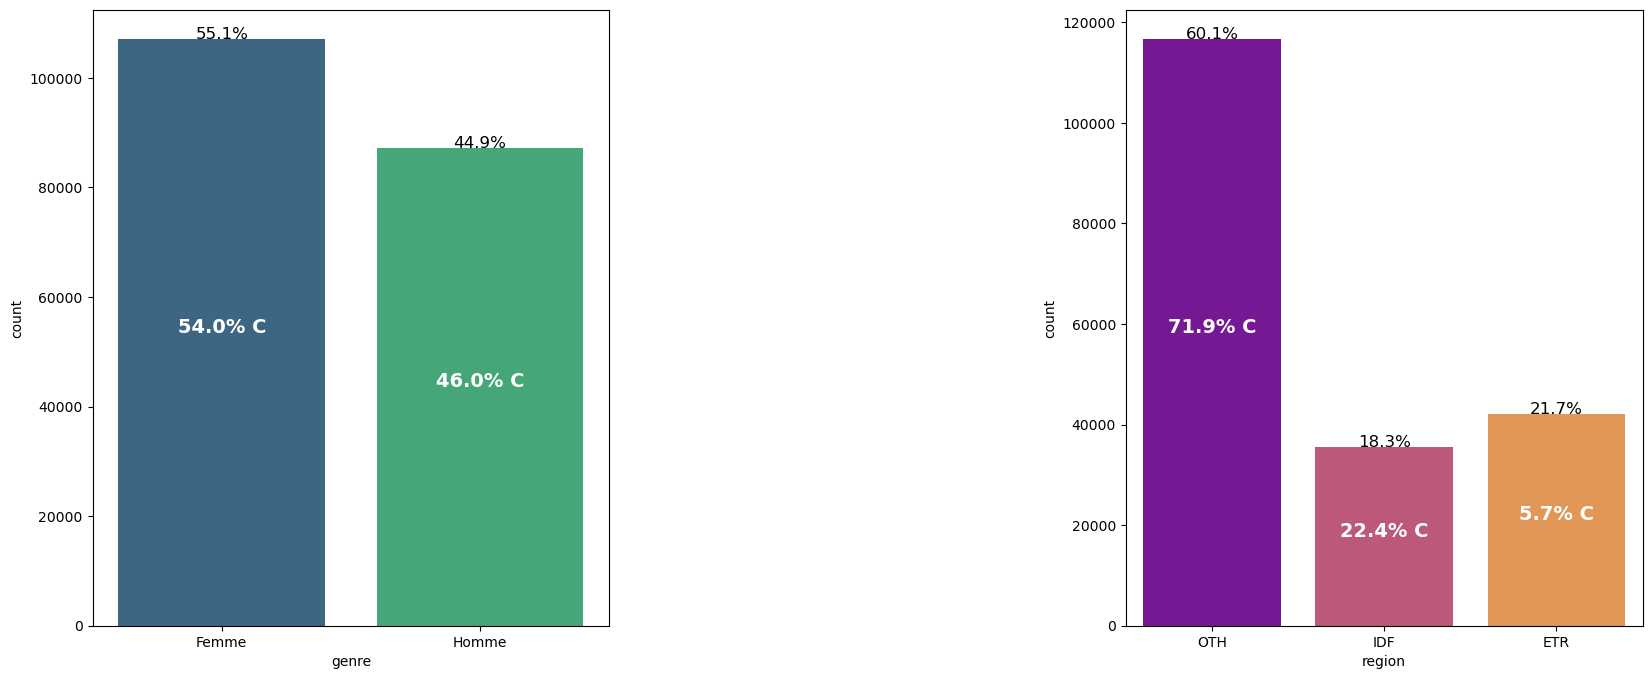

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour afficher les pourcentages
def without_hue(ax, feature, proportions=None):
    total = len(feature)
    for i, p in enumerate(ax.patches):
        # Affiche la proportion de la modalité dans la base au-dessus de la barre
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y + 0.1), size=12, ha='center')
        
        # Affiche la proportion consommée au centre de la barre
        if proportions is not None:
            # Conversion de proportions en liste pour indexation correcte
            proportions_list = list(proportions)
            consumption_percentage = '{:.1f}% C'.format(proportions_list[i])
            y_center = p.get_height() / 2  # Position au centre de la barre
            ax.annotate(consumption_percentage, (x, y_center), size=14, color='white', ha='center', weight='bold')

# Calcul des proportions de consommation (normalisées pour que la somme = 100)
def calculate_consumption_proportions(base, group_col, consumption_col):
    # Somme totale des consommations
    total_consumption = base[consumption_col].sum()
    
    # Initialisation d'un dictionnaire pour stocker les proportions
    consumption_proportions = {}
    
    # Parcourir chaque modalité unique dans la colonne spécifiée
    for modalite in base[group_col].unique():
        # Filtrer les lignes correspondant à la modalité
        subset = base[base[group_col] == modalite]
        
        # Calculer la somme des consommations pour cette modalité
        modality_sum = subset[consumption_col].sum()
      
 
        # Calculer la proportion en pourcentage
        consumption_proportions[modalite] = (modality_sum / total_consumption) * 100
    
    return consumption_proportions

# Création des sous-graphes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Premier graphique : proportions par genre
consumption_proportions_genre = calculate_consumption_proportions(
    data_0, 'genre', 'somme_ra'
)
ax1 = sns.countplot(data=data_0, x='genre', ax=ax[0], palette='viridis')
without_hue(ax1, data_0.genre, proportions=consumption_proportions_genre.values())

# Deuxième graphique : proportions par type de bénéficiaire (hors "Autre")
filtered_base = data_0[data_0['region'] != 'Autre']
consumption_proportions_benef = calculate_consumption_proportions(
    filtered_base, 'region', 'somme_ra'
)
ax2 = sns.countplot(data=filtered_base, x='region', ax=ax[1], palette='plasma')
without_hue(ax2, filtered_base.region, proportions=consumption_proportions_benef.values())

# Ajustement de l'espacement entre les sous-graphiques
plt.subplots_adjust(wspace=1)

# Affichage des graphiques
plt.show()



/tmp/ipykernel_10132/1997892645.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=data_1, x='genre', ax=ax[0], palette='viridis')
/tmp/ipykernel_10132/1997892645.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=filtered_base, x='region', ax=ax[1], palette='plasma')


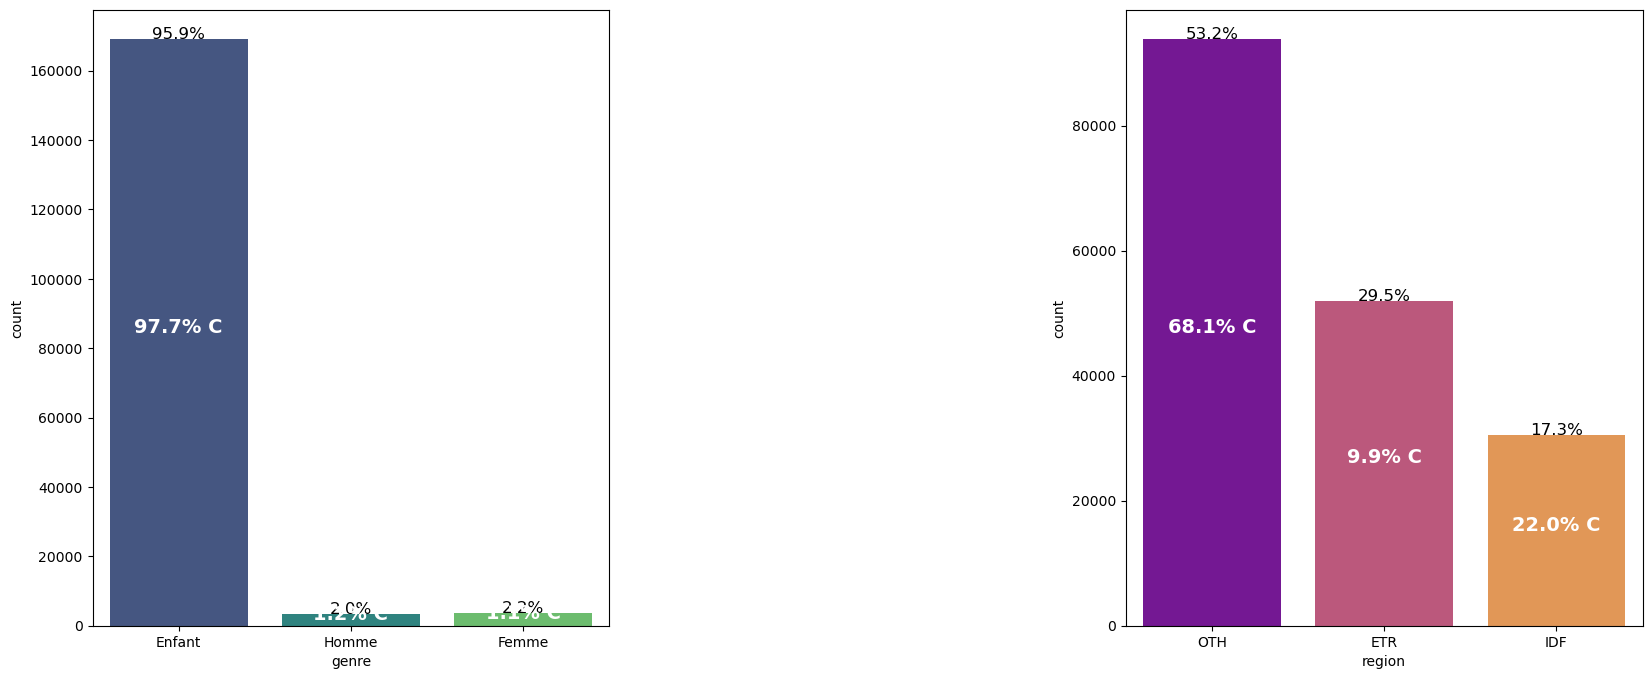

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour afficher les pourcentages
def without_hue(ax, feature, proportions=None):
    total = len(feature)
    for i, p in enumerate(ax.patches):
        # Affiche la proportion de la modalité dans la base au-dessus de la barre
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y + 0.1), size=12, ha='center')
        
        # Affiche la proportion consommée au centre de la barre
        if proportions is not None:
            # Conversion de proportions en liste pour indexation correcte
            proportions_list = list(proportions)
            consumption_percentage = '{:.1f}% C'.format(proportions_list[i])
            y_center = p.get_height() / 2  # Position au centre de la barre
            ax.annotate(consumption_percentage, (x, y_center), size=14, color='white', ha='center', weight='bold')

# Calcul des proportions de consommation (normalisées pour que la somme = 100)
def calculate_consumption_proportions(base, group_col, consumption_col):
    # Somme totale des consommations
    total_consumption = base[consumption_col].sum()
    
    # Initialisation d'un dictionnaire pour stocker les proportions
    consumption_proportions = {}
    
    # Parcourir chaque modalité unique dans la colonne spécifiée
    for modalite in base[group_col].unique():
        # Filtrer les lignes correspondant à la modalité
        subset = base[base[group_col] == modalite]
        
        # Calculer la somme des consommations pour cette modalité
        modality_sum = subset[consumption_col].sum()
      
 
        # Calculer la proportion en pourcentage
        consumption_proportions[modalite] = (modality_sum / total_consumption) * 100
    
    return consumption_proportions

# Création des sous-graphes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Premier graphique : proportions par genre
consumption_proportions_genre = calculate_consumption_proportions(
    data_1, 'genre', 'somme_ra'
)
ax1 = sns.countplot(data=data_1, x='genre', ax=ax[0], palette='viridis')
without_hue(ax1, data_1.genre, proportions=consumption_proportions_genre.values())

# Deuxième graphique : proportions par type de bénéficiaire (hors "Autre")
filtered_base = data_1[data_1['region'] != 'Autre']
consumption_proportions_benef = calculate_consumption_proportions(
    filtered_base, 'region', 'somme_ra'
)
ax2 = sns.countplot(data=filtered_base, x='region', ax=ax[1], palette='plasma')
without_hue(ax2, filtered_base.region, proportions=consumption_proportions_benef.values())

# Ajustement de l'espacement entre les sous-graphiques
plt.subplots_adjust(wspace=1)

# Affichage des graphiques
plt.show()


/tmp/ipykernel_10132/3440058607.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=data_2, x='genre', ax=ax[0], palette='viridis')
/tmp/ipykernel_10132/3440058607.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=filtered_base, x='region', ax=ax[1], palette='plasma')


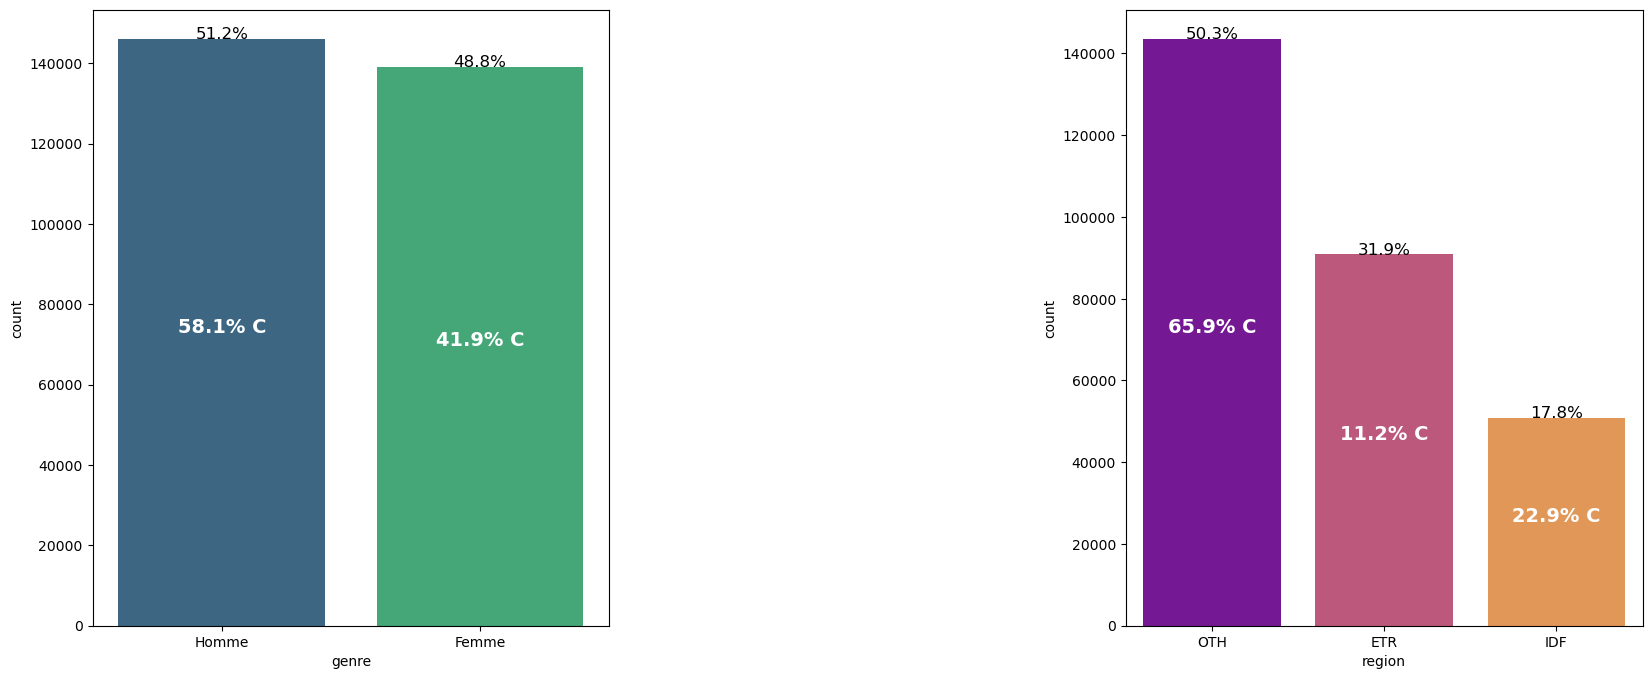

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour afficher les pourcentages
def without_hue(ax, feature, proportions=None):
    total = len(feature)
    for i, p in enumerate(ax.patches):
        # Affiche la proportion de la modalité dans la base au-dessus de la barre
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y + 0.1), size=12, ha='center')
        
        # Affiche la proportion consommée au centre de la barre
        if proportions is not None:
            # Conversion de proportions en liste pour indexation correcte
            proportions_list = list(proportions)
            consumption_percentage = '{:.1f}% C'.format(proportions_list[i])
            y_center = p.get_height() / 2  # Position au centre de la barre
            ax.annotate(consumption_percentage, (x, y_center), size=14, color='white', ha='center', weight='bold')

# Calcul des proportions de consommation (normalisées pour que la somme = 100)
def calculate_consumption_proportions(base, group_col, consumption_col):
    # Somme totale des consommations
    total_consumption = base[consumption_col].sum()
    
    # Initialisation d'un dictionnaire pour stocker les proportions
    consumption_proportions = {}
    
    # Parcourir chaque modalité unique dans la colonne spécifiée
    for modalite in base[group_col].unique():
        # Filtrer les lignes correspondant à la modalité
        subset = base[base[group_col] == modalite]
        
        # Calculer la somme des consommations pour cette modalité
        modality_sum = subset[consumption_col].sum()
      
 
        # Calculer la proportion en pourcentage
        consumption_proportions[modalite] = (modality_sum / total_consumption) * 100
    
    return consumption_proportions

# Création des sous-graphes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Premier graphique : proportions par genre
consumption_proportions_genre = calculate_consumption_proportions(
    data_2, 'genre', 'somme_ra'
)
ax1 = sns.countplot(data=data_2, x='genre', ax=ax[0], palette='viridis')
without_hue(ax1, data_2.genre, proportions=consumption_proportions_genre.values())

# Deuxième graphique : proportions par type de bénéficiaire (hors "Autre")
filtered_base = data_2[data_2['region'] != 'Autre']
consumption_proportions_benef = calculate_consumption_proportions(
    filtered_base, 'region', 'somme_ra'
)
ax2 = sns.countplot(data=filtered_base, x='region', ax=ax[1], palette='plasma')
without_hue(ax2, filtered_base.region, proportions=consumption_proportions_benef.values())

# Ajustement de l'espacement entre les sous-graphiques
plt.subplots_adjust(wspace=1)

# Affichage des graphiques
plt.show()
